# Deep Q-Learning 

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [1]:
# # !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
# %pip install -U tf-agents pyvirtualdisplay
# %pip install -U gym[box2d,atari,accept-rom-license]

In [2]:
# !apt install -y xvfb python-opengl ffmpeg

In [3]:
# !pip3 install -U gym>=0.21.0
# !pip3 install --upgrade setuptools --user
# !pip3 install ez_setup 
# !pip3 install -U gym[box2d,atari,accept-rom-license]

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [9]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN, DQN_LSTM
from config import *

import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2

In [10]:
import joblib

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [11]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

In [12]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [26]:
double_dqn = False # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

100000
cuda:0


### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

In [27]:
continue_training = False

if continue_training == False:
    rewards, episodes = [], []
    best_eval_reward = 0
    start = 0
else:
    # load training params
#     agent = joblib.load("prev_agent")
#     params = joblib.load("prev_params")
    # load training model
    agent.policy_net.load_state_dict(torch.load('./save_model/breakout_DQN_2021_episodes.pth', map_location=torch.device('cpu')))
#     agent.memory = params["agent_memory"]
#     agent.epsilon = params["epsilon"]
#     rewards = params["rewards"]
#     episodes = params["episodes"]
#     best_eval_reward = params["best_eval_reward"]
#     start = params["episodes"][-1]  
    start = 2000

episode: 0   score: 0.0   memory length: 123   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.0
episode: 1   score: 3.0   memory length: 353   epsilon: 1.0    steps: 230    lr: 0.0001     evaluation reward: 1.5
episode: 2   score: 2.0   memory length: 571   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.6666666666666667
episode: 3   score: 0.0   memory length: 695   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.25
episode: 4   score: 1.0   memory length: 847   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.2
episode: 5   score: 1.0   memory length: 1020   epsilon: 1.0    steps: 173    lr: 0.0001     evaluation reward: 1.1666666666666667
episode: 6   score: 1.0   memory length: 1189   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.1428571428571428
episode: 7   score: 3.0   memory length: 1418   epsilon: 1.0    steps: 229    lr: 0.0001     evaluation reward: 1.375
episode: 8   score: 2.0   mem

episode: 64   score: 2.0   memory length: 12556   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.7230769230769232
episode: 65   score: 2.0   memory length: 12755   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.7272727272727273
episode: 66   score: 4.0   memory length: 13033   epsilon: 1.0    steps: 278    lr: 0.0001     evaluation reward: 1.7611940298507462
episode: 67   score: 0.0   memory length: 13157   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.7352941176470589
episode: 68   score: 1.0   memory length: 13327   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.7246376811594204
episode: 69   score: 1.0   memory length: 13497   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.7142857142857142
episode: 70   score: 1.0   memory length: 13649   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.704225352112676
episode: 71   score: 1.0   memory length: 13818   epsilon: 1.0    step

episode: 129   score: 3.0   memory length: 24066   epsilon: 1.0    steps: 226    lr: 0.0001     evaluation reward: 1.53
episode: 130   score: 1.0   memory length: 24218   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.53
episode: 131   score: 2.0   memory length: 24417   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.5
episode: 132   score: 2.0   memory length: 24616   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.47
episode: 133   score: 2.0   memory length: 24815   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.45
episode: 134   score: 1.0   memory length: 24985   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.46
episode: 135   score: 1.0   memory length: 25137   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.47
episode: 136   score: 2.0   memory length: 25356   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.45
episode: 137   score: 4.0   memory length

episode: 198   score: 2.0   memory length: 37247   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.64
episode: 199   score: 1.0   memory length: 37420   epsilon: 1.0    steps: 173    lr: 0.0001     evaluation reward: 1.62
episode: 200   score: 4.0   memory length: 37737   epsilon: 1.0    steps: 317    lr: 0.0001     evaluation reward: 1.63
episode: 201   score: 2.0   memory length: 37955   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.63
episode: 202   score: 1.0   memory length: 38126   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.61
episode: 203   score: 0.0   memory length: 38249   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.61
episode: 204   score: 3.0   memory length: 38495   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.63
episode: 205   score: 4.0   memory length: 38809   epsilon: 1.0    steps: 314    lr: 0.0001     evaluation reward: 1.67
episode: 206   score: 0.0   memory lengt

episode: 267   score: 1.0   memory length: 50689   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.77
episode: 268   score: 2.0   memory length: 50891   epsilon: 1.0    steps: 202    lr: 0.0001     evaluation reward: 1.78
episode: 269   score: 1.0   memory length: 51044   epsilon: 1.0    steps: 153    lr: 0.0001     evaluation reward: 1.75
episode: 270   score: 0.0   memory length: 51168   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.73
episode: 271   score: 2.0   memory length: 51387   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.73
episode: 272   score: 0.0   memory length: 51511   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.72
episode: 273   score: 0.0   memory length: 51635   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.72
episode: 274   score: 3.0   memory length: 51864   epsilon: 1.0    steps: 229    lr: 0.0001     evaluation reward: 1.73
episode: 275   score: 2.0   memory lengt

episode: 336   score: 2.0   memory length: 62566   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.35
episode: 337   score: 1.0   memory length: 62718   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.36
episode: 338   score: 2.0   memory length: 62916   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.37
episode: 339   score: 3.0   memory length: 63185   epsilon: 1.0    steps: 269    lr: 0.0001     evaluation reward: 1.38
episode: 340   score: 0.0   memory length: 63308   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.34
episode: 341   score: 1.0   memory length: 63478   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.29
episode: 342   score: 2.0   memory length: 63682   epsilon: 1.0    steps: 204    lr: 0.0001     evaluation reward: 1.29
episode: 343   score: 2.0   memory length: 63881   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.3
episode: 344   score: 2.0   memory length

episode: 405   score: 3.0   memory length: 76206   epsilon: 1.0    steps: 227    lr: 0.0001     evaluation reward: 1.59
episode: 406   score: 0.0   memory length: 76330   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.58
episode: 407   score: 1.0   memory length: 76500   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.57
episode: 408   score: 0.0   memory length: 76624   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.57
episode: 409   score: 1.0   memory length: 76775   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.58
episode: 410   score: 1.0   memory length: 76929   epsilon: 1.0    steps: 154    lr: 0.0001     evaluation reward: 1.57
episode: 411   score: 1.0   memory length: 77100   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.57
episode: 412   score: 0.0   memory length: 77224   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.56
episode: 413   score: 1.0   memory lengt

episode: 474   score: 0.0   memory length: 88947   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.57
episode: 475   score: 4.0   memory length: 89226   epsilon: 1.0    steps: 279    lr: 0.0001     evaluation reward: 1.58
episode: 476   score: 0.0   memory length: 89349   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.56
episode: 477   score: 2.0   memory length: 89566   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.57
episode: 478   score: 1.0   memory length: 89717   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.58
episode: 479   score: 3.0   memory length: 89981   epsilon: 1.0    steps: 264    lr: 0.0001     evaluation reward: 1.58
episode: 480   score: 0.0   memory length: 90105   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.56
episode: 481   score: 4.0   memory length: 90403   epsilon: 1.0    steps: 298    lr: 0.0001     evaluation reward: 1.59
episode: 482   score: 2.0   memory lengt

episode: 542   score: 2.0   memory length: 100000   epsilon: 0.99723394000006    steps: 220    lr: 0.0001     evaluation reward: 1.44
episode: 543   score: 0.0   memory length: 100000   epsilon: 0.9969884200000654    steps: 124    lr: 0.0001     evaluation reward: 1.44
episode: 544   score: 3.0   memory length: 100000   epsilon: 0.9964597600000769    steps: 267    lr: 0.0001     evaluation reward: 1.44
episode: 545   score: 0.0   memory length: 100000   epsilon: 0.9962142400000822    steps: 124    lr: 0.0001     evaluation reward: 1.43
episode: 546   score: 0.0   memory length: 100000   epsilon: 0.9959707000000875    steps: 123    lr: 0.0001     evaluation reward: 1.43
episode: 547   score: 2.0   memory length: 100000   epsilon: 0.995576680000096    steps: 199    lr: 0.0001     evaluation reward: 1.45
episode: 548   score: 2.0   memory length: 100000   epsilon: 0.9951826600001046    steps: 199    lr: 0.0001     evaluation reward: 1.45
episode: 549   score: 3.0   memory length: 100000  

episode: 603   score: 1.0   memory length: 100000   epsilon: 0.9743392000005571    steps: 172    lr: 0.0001     evaluation reward: 1.48
episode: 604   score: 0.0   memory length: 100000   epsilon: 0.9740936800005624    steps: 124    lr: 0.0001     evaluation reward: 1.47
episode: 605   score: 4.0   memory length: 100000   epsilon: 0.973511560000575    steps: 294    lr: 0.0001     evaluation reward: 1.5
episode: 606   score: 1.0   memory length: 100000   epsilon: 0.9731749600005823    steps: 170    lr: 0.0001     evaluation reward: 1.47
episode: 607   score: 4.0   memory length: 100000   epsilon: 0.9726304600005942    steps: 275    lr: 0.0001     evaluation reward: 1.51
episode: 608   score: 1.0   memory length: 100000   epsilon: 0.9722918800006015    steps: 171    lr: 0.0001     evaluation reward: 1.5
episode: 609   score: 0.0   memory length: 100000   epsilon: 0.9720463600006068    steps: 124    lr: 0.0001     evaluation reward: 1.5
episode: 610   score: 1.0   memory length: 100000   

episode: 664   score: 1.0   memory length: 100000   epsilon: 0.952923520001022    steps: 172    lr: 0.0001     evaluation reward: 1.42
episode: 665   score: 2.0   memory length: 100000   epsilon: 0.9525255400010306    steps: 201    lr: 0.0001     evaluation reward: 1.41
episode: 666   score: 1.0   memory length: 100000   epsilon: 0.9522245800010372    steps: 152    lr: 0.0001     evaluation reward: 1.41
episode: 667   score: 0.0   memory length: 100000   epsilon: 0.9519790600010425    steps: 124    lr: 0.0001     evaluation reward: 1.41
episode: 668   score: 3.0   memory length: 100000   epsilon: 0.9514900000010531    steps: 247    lr: 0.0001     evaluation reward: 1.42
episode: 669   score: 1.0   memory length: 100000   epsilon: 0.9511910200010596    steps: 151    lr: 0.0001     evaluation reward: 1.43
episode: 670   score: 0.0   memory length: 100000   epsilon: 0.9509455000010649    steps: 124    lr: 0.0001     evaluation reward: 1.41
episode: 671   score: 1.0   memory length: 100000

episode: 725   score: 1.0   memory length: 100000   epsilon: 0.9305752600015071    steps: 169    lr: 0.0001     evaluation reward: 1.38
episode: 726   score: 2.0   memory length: 100000   epsilon: 0.9301812400015157    steps: 199    lr: 0.0001     evaluation reward: 1.39
episode: 727   score: 1.0   memory length: 100000   epsilon: 0.929844640001523    steps: 170    lr: 0.0001     evaluation reward: 1.39
episode: 728   score: 2.0   memory length: 100000   epsilon: 0.9294862600015308    steps: 181    lr: 0.0001     evaluation reward: 1.4
episode: 729   score: 2.0   memory length: 100000   epsilon: 0.9290863000015395    steps: 202    lr: 0.0001     evaluation reward: 1.42
episode: 730   score: 4.0   memory length: 100000   epsilon: 0.9285022000015521    steps: 295    lr: 0.0001     evaluation reward: 1.46
episode: 731   score: 3.0   memory length: 100000   epsilon: 0.9280547200015619    steps: 226    lr: 0.0001     evaluation reward: 1.48
episode: 732   score: 3.0   memory length: 100000 

episode: 786   score: 1.0   memory length: 100000   epsilon: 0.9082824400019911    steps: 173    lr: 0.0001     evaluation reward: 1.6
episode: 787   score: 2.0   memory length: 100000   epsilon: 0.9078904000019996    steps: 198    lr: 0.0001     evaluation reward: 1.62
episode: 788   score: 1.0   memory length: 100000   epsilon: 0.907549840002007    steps: 172    lr: 0.0001     evaluation reward: 1.63
episode: 789   score: 3.0   memory length: 100000   epsilon: 0.9071003800020168    steps: 227    lr: 0.0001     evaluation reward: 1.66
episode: 790   score: 0.0   memory length: 100000   epsilon: 0.906856840002022    steps: 123    lr: 0.0001     evaluation reward: 1.66
episode: 791   score: 1.0   memory length: 100000   epsilon: 0.9065558800020286    steps: 152    lr: 0.0001     evaluation reward: 1.65
episode: 792   score: 0.0   memory length: 100000   epsilon: 0.9063123400020339    steps: 123    lr: 0.0001     evaluation reward: 1.64
episode: 793   score: 2.0   memory length: 100000  

episode: 847   score: 3.0   memory length: 100000   epsilon: 0.8855599600024844    steps: 249    lr: 0.0001     evaluation reward: 1.57
episode: 848   score: 0.0   memory length: 100000   epsilon: 0.8853144400024897    steps: 124    lr: 0.0001     evaluation reward: 1.53
episode: 849   score: 1.0   memory length: 100000   epsilon: 0.8850134800024962    steps: 152    lr: 0.0001     evaluation reward: 1.54
episode: 850   score: 2.0   memory length: 100000   epsilon: 0.8846214400025048    steps: 198    lr: 0.0001     evaluation reward: 1.56
episode: 851   score: 2.0   memory length: 100000   epsilon: 0.8842571200025127    steps: 184    lr: 0.0001     evaluation reward: 1.57
episode: 852   score: 1.0   memory length: 100000   epsilon: 0.88392052000252    steps: 170    lr: 0.0001     evaluation reward: 1.56
episode: 853   score: 1.0   memory length: 100000   epsilon: 0.8835819400025273    steps: 171    lr: 0.0001     evaluation reward: 1.56
episode: 854   score: 3.0   memory length: 100000 

episode: 908   score: 0.0   memory length: 100000   epsilon: 0.8631602200029707    steps: 124    lr: 0.0001     evaluation reward: 1.69
episode: 909   score: 2.0   memory length: 100000   epsilon: 0.8627681800029792    steps: 198    lr: 0.0001     evaluation reward: 1.69
episode: 910   score: 2.0   memory length: 100000   epsilon: 0.8623325800029886    steps: 220    lr: 0.0001     evaluation reward: 1.65
episode: 911   score: 3.0   memory length: 100000   epsilon: 0.8618712400029986    steps: 233    lr: 0.0001     evaluation reward: 1.67
episode: 912   score: 0.0   memory length: 100000   epsilon: 0.861625720003004    steps: 124    lr: 0.0001     evaluation reward: 1.67
episode: 913   score: 2.0   memory length: 100000   epsilon: 0.8611960600030133    steps: 217    lr: 0.0001     evaluation reward: 1.68
episode: 914   score: 0.0   memory length: 100000   epsilon: 0.8609525200030186    steps: 123    lr: 0.0001     evaluation reward: 1.66
episode: 915   score: 3.0   memory length: 100000

episode: 969   score: 2.0   memory length: 100000   epsilon: 0.840988180003452    steps: 202    lr: 0.0001     evaluation reward: 1.56
episode: 970   score: 3.0   memory length: 100000   epsilon: 0.8404615000034634    steps: 266    lr: 0.0001     evaluation reward: 1.59
episode: 971   score: 2.0   memory length: 100000   epsilon: 0.840067480003472    steps: 199    lr: 0.0001     evaluation reward: 1.59
episode: 972   score: 2.0   memory length: 100000   epsilon: 0.8396279200034815    steps: 222    lr: 0.0001     evaluation reward: 1.6
episode: 973   score: 1.0   memory length: 100000   epsilon: 0.8392893400034889    steps: 171    lr: 0.0001     evaluation reward: 1.59
episode: 974   score: 2.0   memory length: 100000   epsilon: 0.8388953200034974    steps: 199    lr: 0.0001     evaluation reward: 1.59
episode: 975   score: 3.0   memory length: 100000   epsilon: 0.8384023000035081    steps: 249    lr: 0.0001     evaluation reward: 1.6
episode: 976   score: 0.0   memory length: 100000   

episode: 1030   score: 3.0   memory length: 100000   epsilon: 0.8192992600039228    steps: 248    lr: 0.0001     evaluation reward: 1.41
episode: 1031   score: 1.0   memory length: 100000   epsilon: 0.8189626600039301    steps: 170    lr: 0.0001     evaluation reward: 1.42
episode: 1032   score: 0.0   memory length: 100000   epsilon: 0.8187171400039355    steps: 124    lr: 0.0001     evaluation reward: 1.4
episode: 1033   score: 0.0   memory length: 100000   epsilon: 0.8184716200039408    steps: 124    lr: 0.0001     evaluation reward: 1.38
episode: 1034   score: 0.0   memory length: 100000   epsilon: 0.8182261000039461    steps: 124    lr: 0.0001     evaluation reward: 1.36
episode: 1035   score: 0.0   memory length: 100000   epsilon: 0.8179825600039514    steps: 123    lr: 0.0001     evaluation reward: 1.35
episode: 1036   score: 1.0   memory length: 100000   epsilon: 0.8176459600039587    steps: 170    lr: 0.0001     evaluation reward: 1.35
episode: 1037   score: 3.0   memory length

episode: 1090   score: 2.0   memory length: 100000   epsilon: 0.7958521000044319    steps: 198    lr: 4e-05     evaluation reward: 1.57
episode: 1091   score: 4.0   memory length: 100000   epsilon: 0.7952640400044446    steps: 297    lr: 4e-05     evaluation reward: 1.6
episode: 1092   score: 3.0   memory length: 100000   epsilon: 0.7947789400044551    steps: 245    lr: 4e-05     evaluation reward: 1.61
episode: 1093   score: 3.0   memory length: 100000   epsilon: 0.7942879000044658    steps: 248    lr: 4e-05     evaluation reward: 1.64
episode: 1094   score: 0.0   memory length: 100000   epsilon: 0.7940443600044711    steps: 123    lr: 4e-05     evaluation reward: 1.62
episode: 1095   score: 2.0   memory length: 100000   epsilon: 0.7936523200044796    steps: 198    lr: 4e-05     evaluation reward: 1.63
episode: 1096   score: 1.0   memory length: 100000   epsilon: 0.7933157200044869    steps: 170    lr: 4e-05     evaluation reward: 1.64
episode: 1097   score: 0.0   memory length: 10000

episode: 1151   score: 2.0   memory length: 100000   epsilon: 0.7694408800050052    steps: 199    lr: 4e-05     evaluation reward: 2.34
episode: 1152   score: 0.0   memory length: 100000   epsilon: 0.7691953600050105    steps: 124    lr: 4e-05     evaluation reward: 2.32
episode: 1153   score: 1.0   memory length: 100000   epsilon: 0.768852820005018    steps: 173    lr: 4e-05     evaluation reward: 2.31
episode: 1154   score: 2.0   memory length: 100000   epsilon: 0.7684152400050275    steps: 221    lr: 4e-05     evaluation reward: 2.31
episode: 1155   score: 0.0   memory length: 100000   epsilon: 0.7681697200050328    steps: 124    lr: 4e-05     evaluation reward: 2.29
episode: 1156   score: 7.0   memory length: 100000   epsilon: 0.767334160005051    steps: 422    lr: 4e-05     evaluation reward: 2.32
episode: 1157   score: 3.0   memory length: 100000   epsilon: 0.7668451000050616    steps: 247    lr: 4e-05     evaluation reward: 2.33
episode: 1158   score: 0.0   memory length: 100000

episode: 1212   score: 3.0   memory length: 100000   epsilon: 0.7434989200055684    steps: 227    lr: 4e-05     evaluation reward: 2.41
episode: 1213   score: 3.0   memory length: 100000   epsilon: 0.7430138200055789    steps: 245    lr: 4e-05     evaluation reward: 2.41
episode: 1214   score: 0.0   memory length: 100000   epsilon: 0.7427683000055842    steps: 124    lr: 4e-05     evaluation reward: 2.38
episode: 1215   score: 1.0   memory length: 100000   epsilon: 0.7424673400055908    steps: 152    lr: 4e-05     evaluation reward: 2.37
episode: 1216   score: 0.0   memory length: 100000   epsilon: 0.7422218200055961    steps: 124    lr: 4e-05     evaluation reward: 2.35
episode: 1217   score: 4.0   memory length: 100000   epsilon: 0.7416357400056088    steps: 296    lr: 4e-05     evaluation reward: 2.39
episode: 1218   score: 3.0   memory length: 100000   epsilon: 0.7411447000056195    steps: 248    lr: 4e-05     evaluation reward: 2.39
episode: 1219   score: 3.0   memory length: 1000

episode: 1273   score: 2.0   memory length: 100000   epsilon: 0.7154819200061766    steps: 199    lr: 4e-05     evaluation reward: 2.67
episode: 1274   score: 3.0   memory length: 100000   epsilon: 0.7150621600061857    steps: 212    lr: 4e-05     evaluation reward: 2.7
episode: 1275   score: 3.0   memory length: 100000   epsilon: 0.7145711200061964    steps: 248    lr: 4e-05     evaluation reward: 2.7
episode: 1276   score: 3.0   memory length: 100000   epsilon: 0.7140860200062069    steps: 245    lr: 4e-05     evaluation reward: 2.73
episode: 1277   score: 3.0   memory length: 100000   epsilon: 0.7135969600062175    steps: 247    lr: 4e-05     evaluation reward: 2.73
episode: 1278   score: 1.0   memory length: 100000   epsilon: 0.7132960000062241    steps: 152    lr: 4e-05     evaluation reward: 2.71
episode: 1279   score: 2.0   memory length: 100000   epsilon: 0.7129019800062326    steps: 199    lr: 4e-05     evaluation reward: 2.72
episode: 1280   score: 2.0   memory length: 100000

episode: 1334   score: 2.0   memory length: 100000   epsilon: 0.6861482200068134    steps: 199    lr: 4e-05     evaluation reward: 3.09
episode: 1335   score: 3.0   memory length: 100000   epsilon: 0.685659160006824    steps: 247    lr: 4e-05     evaluation reward: 3.07
episode: 1336   score: 5.0   memory length: 100000   epsilon: 0.6849760600068389    steps: 345    lr: 4e-05     evaluation reward: 3.1
episode: 1337   score: 3.0   memory length: 100000   epsilon: 0.6844493800068503    steps: 266    lr: 4e-05     evaluation reward: 3.07
episode: 1338   score: 2.0   memory length: 100000   epsilon: 0.6840573400068588    steps: 198    lr: 4e-05     evaluation reward: 3.05
episode: 1339   score: 5.0   memory length: 100000   epsilon: 0.6834316600068724    steps: 316    lr: 4e-05     evaluation reward: 3.08
episode: 1340   score: 1.0   memory length: 100000   epsilon: 0.6831307000068789    steps: 152    lr: 4e-05     evaluation reward: 3.05
episode: 1341   score: 3.0   memory length: 100000

episode: 1395   score: 0.0   memory length: 100000   epsilon: 0.6565888000074551    steps: 124    lr: 4e-05     evaluation reward: 3.2
episode: 1396   score: 3.0   memory length: 100000   epsilon: 0.6560938000074659    steps: 250    lr: 4e-05     evaluation reward: 3.19
episode: 1397   score: 1.0   memory length: 100000   epsilon: 0.6557928400074724    steps: 152    lr: 4e-05     evaluation reward: 3.15
episode: 1398   score: 1.0   memory length: 100000   epsilon: 0.6554562400074797    steps: 170    lr: 4e-05     evaluation reward: 3.11
episode: 1399   score: 3.0   memory length: 100000   epsilon: 0.6550067800074895    steps: 227    lr: 4e-05     evaluation reward: 3.14
episode: 1400   score: 3.0   memory length: 100000   epsilon: 0.6545593000074992    steps: 226    lr: 4e-05     evaluation reward: 3.13
episode: 1401   score: 3.0   memory length: 100000   epsilon: 0.6541098400075089    steps: 227    lr: 4e-05     evaluation reward: 3.12
episode: 1402   score: 3.0   memory length: 10000

episode: 1456   score: 2.0   memory length: 100000   epsilon: 0.6286648600080613    steps: 202    lr: 4e-05     evaluation reward: 2.87
episode: 1457   score: 3.0   memory length: 100000   epsilon: 0.628217380008071    steps: 226    lr: 4e-05     evaluation reward: 2.85
episode: 1458   score: 3.0   memory length: 100000   epsilon: 0.6277619800080809    steps: 230    lr: 4e-05     evaluation reward: 2.85
episode: 1459   score: 4.0   memory length: 100000   epsilon: 0.6272095600080929    steps: 279    lr: 4e-05     evaluation reward: 2.85
episode: 1460   score: 3.0   memory length: 100000   epsilon: 0.6267601000081027    steps: 227    lr: 4e-05     evaluation reward: 2.87
episode: 1461   score: 4.0   memory length: 100000   epsilon: 0.6261799600081153    steps: 293    lr: 4e-05     evaluation reward: 2.88
episode: 1462   score: 2.0   memory length: 100000   epsilon: 0.6257859400081238    steps: 199    lr: 4e-05     evaluation reward: 2.87
episode: 1463   score: 3.0   memory length: 10000

episode: 1516   score: 2.0   memory length: 100000   epsilon: 0.600994360008662    steps: 183    lr: 1.6000000000000003e-05     evaluation reward: 2.86
episode: 1517   score: 1.0   memory length: 100000   epsilon: 0.6006557800086694    steps: 171    lr: 1.6000000000000003e-05     evaluation reward: 2.84
episode: 1518   score: 2.0   memory length: 100000   epsilon: 0.6002934400086772    steps: 183    lr: 1.6000000000000003e-05     evaluation reward: 2.83
episode: 1519   score: 2.0   memory length: 100000   epsilon: 0.5998994200086858    steps: 199    lr: 1.6000000000000003e-05     evaluation reward: 2.85
episode: 1520   score: 4.0   memory length: 100000   epsilon: 0.5993529400086977    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 2.85
episode: 1521   score: 1.0   memory length: 100000   epsilon: 0.599014360008705    steps: 171    lr: 1.6000000000000003e-05     evaluation reward: 2.83
episode: 1522   score: 1.0   memory length: 100000   epsilon: 0.5987134000087115    

episode: 1570   score: 1.0   memory length: 100000   epsilon: 0.5764799800091942    steps: 172    lr: 1.6000000000000003e-05     evaluation reward: 2.82
episode: 1571   score: 2.0   memory length: 100000   epsilon: 0.5760463600092036    steps: 219    lr: 1.6000000000000003e-05     evaluation reward: 2.82
episode: 1572   score: 3.0   memory length: 100000   epsilon: 0.5755553200092143    steps: 248    lr: 1.6000000000000003e-05     evaluation reward: 2.83
episode: 1573   score: 2.0   memory length: 100000   epsilon: 0.5751613000092228    steps: 199    lr: 1.6000000000000003e-05     evaluation reward: 2.82
episode: 1574   score: 4.0   memory length: 100000   epsilon: 0.5746227400092345    steps: 272    lr: 1.6000000000000003e-05     evaluation reward: 2.84
episode: 1575   score: 1.0   memory length: 100000   epsilon: 0.5743217800092411    steps: 152    lr: 1.6000000000000003e-05     evaluation reward: 2.78
episode: 1576   score: 2.0   memory length: 100000   epsilon: 0.5738842000092506  

episode: 1624   score: 4.0   memory length: 100000   epsilon: 0.5502925000097627    steps: 260    lr: 1.6000000000000003e-05     evaluation reward: 3.07
episode: 1625   score: 4.0   memory length: 100000   epsilon: 0.5497341400097748    steps: 282    lr: 1.6000000000000003e-05     evaluation reward: 3.08
episode: 1626   score: 2.0   memory length: 100000   epsilon: 0.5493718000097827    steps: 183    lr: 1.6000000000000003e-05     evaluation reward: 3.07
episode: 1627   score: 3.0   memory length: 100000   epsilon: 0.5488827400097933    steps: 247    lr: 1.6000000000000003e-05     evaluation reward: 3.07
episode: 1628   score: 6.0   memory length: 100000   epsilon: 0.5481442000098093    steps: 373    lr: 1.6000000000000003e-05     evaluation reward: 3.08
episode: 1629   score: 3.0   memory length: 100000   epsilon: 0.5476571200098199    steps: 246    lr: 1.6000000000000003e-05     evaluation reward: 3.07
episode: 1630   score: 3.0   memory length: 100000   epsilon: 0.5471660800098306  

episode: 1678   score: 2.0   memory length: 100000   epsilon: 0.5227526800103606    steps: 183    lr: 1.6000000000000003e-05     evaluation reward: 3.46
episode: 1679   score: 1.0   memory length: 100000   epsilon: 0.5224517200103671    steps: 152    lr: 1.6000000000000003e-05     evaluation reward: 3.44
episode: 1680   score: 3.0   memory length: 100000   epsilon: 0.5220280000103763    steps: 214    lr: 1.6000000000000003e-05     evaluation reward: 3.46
episode: 1681   score: 3.0   memory length: 100000   epsilon: 0.5215785400103861    steps: 227    lr: 1.6000000000000003e-05     evaluation reward: 3.44
episode: 1682   score: 3.0   memory length: 100000   epsilon: 0.521123140010396    steps: 230    lr: 1.6000000000000003e-05     evaluation reward: 3.46
episode: 1683   score: 2.0   memory length: 100000   epsilon: 0.5207192200104047    steps: 204    lr: 1.6000000000000003e-05     evaluation reward: 3.44
episode: 1684   score: 2.0   memory length: 100000   epsilon: 0.5203568800104126   

episode: 1732   score: 4.0   memory length: 100000   epsilon: 0.49532770001082493    steps: 260    lr: 1.6000000000000003e-05     evaluation reward: 3.64
episode: 1733   score: 4.0   memory length: 100000   epsilon: 0.4947733000108214    steps: 280    lr: 1.6000000000000003e-05     evaluation reward: 3.65
episode: 1734   score: 2.0   memory length: 100000   epsilon: 0.4943773000108189    steps: 200    lr: 1.6000000000000003e-05     evaluation reward: 3.64
episode: 1735   score: 5.0   memory length: 100000   epsilon: 0.4937912200108152    steps: 296    lr: 1.6000000000000003e-05     evaluation reward: 3.65
episode: 1736   score: 3.0   memory length: 100000   epsilon: 0.49333582001081233    steps: 230    lr: 1.6000000000000003e-05     evaluation reward: 3.63
episode: 1737   score: 3.0   memory length: 100000   epsilon: 0.49288240001080946    steps: 229    lr: 1.6000000000000003e-05     evaluation reward: 3.64
episode: 1738   score: 4.0   memory length: 100000   epsilon: 0.492296320010805

episode: 1786   score: 4.0   memory length: 100000   epsilon: 0.46967878001066266    steps: 295    lr: 1.6000000000000003e-05     evaluation reward: 3.43
episode: 1787   score: 5.0   memory length: 100000   epsilon: 0.4689877600106583    steps: 349    lr: 1.6000000000000003e-05     evaluation reward: 3.45
episode: 1788   score: 5.0   memory length: 100000   epsilon: 0.4683403000106542    steps: 327    lr: 1.6000000000000003e-05     evaluation reward: 3.46
episode: 1789   score: 4.0   memory length: 100000   epsilon: 0.46779382001065073    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 3.48
episode: 1790   score: 9.0   memory length: 100000   epsilon: 0.4671087400106464    steps: 346    lr: 1.6000000000000003e-05     evaluation reward: 3.53
episode: 1791   score: 6.0   memory length: 100000   epsilon: 0.46638802001064184    steps: 364    lr: 1.6000000000000003e-05     evaluation reward: 3.56
episode: 1792   score: 3.0   memory length: 100000   epsilon: 0.465898960010638

episode: 1840   score: 3.0   memory length: 100000   epsilon: 0.43859080001046596    steps: 211    lr: 1.6000000000000003e-05     evaluation reward: 3.85
episode: 1841   score: 6.0   memory length: 100000   epsilon: 0.43790968001046165    steps: 344    lr: 1.6000000000000003e-05     evaluation reward: 3.87
episode: 1842   score: 4.0   memory length: 100000   epsilon: 0.4373968600104584    steps: 259    lr: 1.6000000000000003e-05     evaluation reward: 3.88
episode: 1843   score: 3.0   memory length: 100000   epsilon: 0.43697314001045573    steps: 214    lr: 1.6000000000000003e-05     evaluation reward: 3.85
episode: 1844   score: 3.0   memory length: 100000   epsilon: 0.4365217000104529    steps: 228    lr: 1.6000000000000003e-05     evaluation reward: 3.85
episode: 1845   score: 3.0   memory length: 100000   epsilon: 0.43606630001045    steps: 230    lr: 1.6000000000000003e-05     evaluation reward: 3.85
episode: 1846   score: 1.0   memory length: 100000   epsilon: 0.4357653400104481 

episode: 1894   score: 4.0   memory length: 100000   epsilon: 0.41095792001029113    steps: 279    lr: 1.6000000000000003e-05     evaluation reward: 4.08
episode: 1895   score: 6.0   memory length: 100000   epsilon: 0.4102867000102869    steps: 339    lr: 1.6000000000000003e-05     evaluation reward: 4.06
episode: 1896   score: 3.0   memory length: 100000   epsilon: 0.409833280010284    steps: 229    lr: 1.6000000000000003e-05     evaluation reward: 4.06
episode: 1897   score: 4.0   memory length: 100000   epsilon: 0.409356100010281    steps: 241    lr: 1.6000000000000003e-05     evaluation reward: 4.03
episode: 1898   score: 6.0   memory length: 100000   epsilon: 0.40869874001027684    steps: 332    lr: 1.6000000000000003e-05     evaluation reward: 4.05
episode: 1899   score: 5.0   memory length: 100000   epsilon: 0.40812850001027323    steps: 288    lr: 1.6000000000000003e-05     evaluation reward: 4.06
episode: 1900   score: 2.0   memory length: 100000   epsilon: 0.40776616001027094

episode: 1948   score: 3.0   memory length: 100000   epsilon: 0.3824043400101105    steps: 212    lr: 6.400000000000001e-06     evaluation reward: 3.96
episode: 1949   score: 3.0   memory length: 100000   epsilon: 0.3819509200101076    steps: 229    lr: 6.400000000000001e-06     evaluation reward: 3.94
episode: 1950   score: 4.0   memory length: 100000   epsilon: 0.38135692001010385    steps: 300    lr: 6.400000000000001e-06     evaluation reward: 3.93
episode: 1951   score: 6.0   memory length: 100000   epsilon: 0.38069362001009965    steps: 335    lr: 6.400000000000001e-06     evaluation reward: 3.96
episode: 1952   score: 3.0   memory length: 100000   epsilon: 0.3802421800100968    steps: 228    lr: 6.400000000000001e-06     evaluation reward: 3.96
episode: 1953   score: 6.0   memory length: 100000   epsilon: 0.37958680001009265    steps: 331    lr: 6.400000000000001e-06     evaluation reward: 3.98
episode: 1954   score: 2.0   memory length: 100000   epsilon: 0.3792284200100904    s

episode: 2002   score: 4.0   memory length: 100000   epsilon: 0.35350624000992764    steps: 278    lr: 6.400000000000001e-06     evaluation reward: 4.04
episode: 2003   score: 5.0   memory length: 100000   epsilon: 0.3529003600099238    steps: 306    lr: 6.400000000000001e-06     evaluation reward: 4.07
episode: 2004   score: 6.0   memory length: 100000   epsilon: 0.3521915200099193    steps: 358    lr: 6.400000000000001e-06     evaluation reward: 4.1
episode: 2005   score: 4.0   memory length: 100000   epsilon: 0.3516787000099161    steps: 259    lr: 6.400000000000001e-06     evaluation reward: 4.1
episode: 2006   score: 5.0   memory length: 100000   epsilon: 0.35109262000991237    steps: 296    lr: 6.400000000000001e-06     evaluation reward: 4.08
episode: 2007   score: 3.0   memory length: 100000   epsilon: 0.3506748400099097    steps: 211    lr: 6.400000000000001e-06     evaluation reward: 4.07
episode: 2008   score: 6.0   memory length: 100000   epsilon: 0.3499937200099054    step

episode: 2056   score: 3.0   memory length: 100000   epsilon: 0.3224875600097314    steps: 210    lr: 6.400000000000001e-06     evaluation reward: 4.35
episode: 2057   score: 7.0   memory length: 100000   epsilon: 0.32162626000972594    steps: 435    lr: 6.400000000000001e-06     evaluation reward: 4.39
episode: 2058   score: 2.0   memory length: 100000   epsilon: 0.32126392000972365    steps: 183    lr: 6.400000000000001e-06     evaluation reward: 4.36
episode: 2059   score: 5.0   memory length: 100000   epsilon: 0.3206560600097198    steps: 307    lr: 6.400000000000001e-06     evaluation reward: 4.36
episode: 2060   score: 6.0   memory length: 100000   epsilon: 0.3200105800097157    steps: 326    lr: 6.400000000000001e-06     evaluation reward: 4.4
episode: 2061   score: 3.0   memory length: 100000   epsilon: 0.3195155800097126    steps: 250    lr: 6.400000000000001e-06     evaluation reward: 4.41
episode: 2062   score: 7.0   memory length: 100000   epsilon: 0.3187572400097078    ste

episode: 2110   score: 4.0   memory length: 100000   epsilon: 0.2918411200095375    steps: 279    lr: 6.400000000000001e-06     evaluation reward: 4.48
episode: 2111   score: 4.0   memory length: 100000   epsilon: 0.29129464000953403    steps: 276    lr: 6.400000000000001e-06     evaluation reward: 4.44
episode: 2112   score: 4.0   memory length: 100000   epsilon: 0.2907481600095306    steps: 276    lr: 6.400000000000001e-06     evaluation reward: 4.43
episode: 2113   score: 5.0   memory length: 100000   epsilon: 0.29020564000952714    steps: 274    lr: 6.400000000000001e-06     evaluation reward: 4.43
episode: 2114   score: 3.0   memory length: 100000   epsilon: 0.2897878600095245    steps: 211    lr: 6.400000000000001e-06     evaluation reward: 4.42
episode: 2115   score: 6.0   memory length: 100000   epsilon: 0.28903744000951975    steps: 379    lr: 6.400000000000001e-06     evaluation reward: 4.45
episode: 2116   score: 4.0   memory length: 100000   epsilon: 0.2885226400095165    s

episode: 2164   score: 3.0   memory length: 100000   epsilon: 0.26026804000933773    steps: 214    lr: 6.400000000000001e-06     evaluation reward: 4.53
episode: 2165   score: 3.0   memory length: 100000   epsilon: 0.25984630000933506    steps: 213    lr: 6.400000000000001e-06     evaluation reward: 4.51
episode: 2166   score: 7.0   memory length: 100000   epsilon: 0.25935724000933197    steps: 247    lr: 6.400000000000001e-06     evaluation reward: 4.52
episode: 2167   score: 3.0   memory length: 100000   epsilon: 0.2589058000093291    steps: 228    lr: 6.400000000000001e-06     evaluation reward: 4.51
episode: 2168   score: 4.0   memory length: 100000   epsilon: 0.25836130000932567    steps: 275    lr: 6.400000000000001e-06     evaluation reward: 4.49
episode: 2169   score: 3.0   memory length: 100000   epsilon: 0.25786828000932255    steps: 249    lr: 6.400000000000001e-06     evaluation reward: 4.5
episode: 2170   score: 4.0   memory length: 100000   epsilon: 0.25731190000931903   

episode: 2218   score: 3.0   memory length: 100000   epsilon: 0.22953250000914327    steps: 231    lr: 6.400000000000001e-06     evaluation reward: 4.67
episode: 2219   score: 7.0   memory length: 100000   epsilon: 0.2287325800091382    steps: 404    lr: 6.400000000000001e-06     evaluation reward: 4.68
episode: 2220   score: 5.0   memory length: 100000   epsilon: 0.22812670000913438    steps: 306    lr: 6.400000000000001e-06     evaluation reward: 4.71
episode: 2221   score: 5.0   memory length: 100000   epsilon: 0.2275129000091305    steps: 310    lr: 6.400000000000001e-06     evaluation reward: 4.72
episode: 2222   score: 6.0   memory length: 100000   epsilon: 0.2268496000091263    steps: 335    lr: 6.400000000000001e-06     evaluation reward: 4.69
episode: 2223   score: 3.0   memory length: 100000   epsilon: 0.22639618000912343    steps: 229    lr: 6.400000000000001e-06     evaluation reward: 4.7
episode: 2224   score: 7.0   memory length: 100000   epsilon: 0.22561210000911847    s

episode: 2272   score: 4.0   memory length: 100000   epsilon: 0.19634968000893332    steps: 278    lr: 2.560000000000001e-06     evaluation reward: 4.94
episode: 2273   score: 6.0   memory length: 100000   epsilon: 0.19564084000892884    steps: 358    lr: 2.560000000000001e-06     evaluation reward: 4.95
episode: 2274   score: 3.0   memory length: 100000   epsilon: 0.19517950000892592    steps: 233    lr: 2.560000000000001e-06     evaluation reward: 4.94
episode: 2275   score: 6.0   memory length: 100000   epsilon: 0.1944825400089215    steps: 352    lr: 2.560000000000001e-06     evaluation reward: 4.94
episode: 2276   score: 3.0   memory length: 100000   epsilon: 0.19403308000891867    steps: 227    lr: 2.560000000000001e-06     evaluation reward: 4.94
episode: 2277   score: 4.0   memory length: 100000   epsilon: 0.19348264000891519    steps: 278    lr: 2.560000000000001e-06     evaluation reward: 4.92
episode: 2278   score: 5.0   memory length: 100000   epsilon: 0.19283914000891111  

episode: 2326   score: 4.0   memory length: 100000   epsilon: 0.16387570000872786    steps: 257    lr: 2.560000000000001e-06     evaluation reward: 4.92
episode: 2327   score: 3.0   memory length: 100000   epsilon: 0.1634539600087252    steps: 213    lr: 2.560000000000001e-06     evaluation reward: 4.92
episode: 2328   score: 6.0   memory length: 100000   epsilon: 0.1627094800087205    steps: 376    lr: 2.560000000000001e-06     evaluation reward: 4.94
episode: 2329   score: 5.0   memory length: 100000   epsilon: 0.16208380000871653    steps: 316    lr: 2.560000000000001e-06     evaluation reward: 4.94
episode: 2330   score: 4.0   memory length: 100000   epsilon: 0.16156900000871327    steps: 260    lr: 2.560000000000001e-06     evaluation reward: 4.95
episode: 2331   score: 6.0   memory length: 100000   epsilon: 0.16089976000870904    steps: 338    lr: 2.560000000000001e-06     evaluation reward: 4.97
episode: 2332   score: 7.0   memory length: 100000   epsilon: 0.16005232000870367   

episode: 2380   score: 3.0   memory length: 100000   epsilon: 0.13039984000851607    steps: 226    lr: 2.560000000000001e-06     evaluation reward: 5.08
episode: 2381   score: 5.0   memory length: 100000   epsilon: 0.12979198000851222    steps: 307    lr: 2.560000000000001e-06     evaluation reward: 5.09
episode: 2382   score: 9.0   memory length: 100000   epsilon: 0.12882772000850612    steps: 487    lr: 2.560000000000001e-06     evaluation reward: 5.12
episode: 2383   score: 5.0   memory length: 100000   epsilon: 0.128178280008502    steps: 328    lr: 2.560000000000001e-06     evaluation reward: 5.11
episode: 2384   score: 4.0   memory length: 100000   epsilon: 0.1276694200084988    steps: 257    lr: 2.560000000000001e-06     evaluation reward: 5.09
episode: 2385   score: 3.0   memory length: 100000   epsilon: 0.12724768000849612    steps: 213    lr: 2.560000000000001e-06     evaluation reward: 5.09
episode: 2386   score: 5.0   memory length: 100000   epsilon: 0.126598240008492    st

episode: 2434   score: 6.0   memory length: 100000   epsilon: 0.09781696000850044    steps: 336    lr: 2.560000000000001e-06     evaluation reward: 5.2
episode: 2435   score: 8.0   memory length: 100000   epsilon: 0.09695566000850103    steps: 435    lr: 2.560000000000001e-06     evaluation reward: 5.23
episode: 2436   score: 6.0   memory length: 100000   epsilon: 0.09624880000850151    steps: 357    lr: 2.560000000000001e-06     evaluation reward: 5.23
episode: 2437   score: 6.0   memory length: 100000   epsilon: 0.095532040008502    steps: 362    lr: 2.560000000000001e-06     evaluation reward: 5.23
episode: 2438   score: 6.0   memory length: 100000   epsilon: 0.09489844000850244    steps: 320    lr: 2.560000000000001e-06     evaluation reward: 5.23
episode: 2439   score: 5.0   memory length: 100000   epsilon: 0.09433216000850282    steps: 286    lr: 2.560000000000001e-06     evaluation reward: 5.2
episode: 2440   score: 7.0   memory length: 100000   epsilon: 0.09356986000850334    s

episode: 2488   score: 5.0   memory length: 100000   epsilon: 0.06222844000852472    steps: 287    lr: 2.560000000000001e-06     evaluation reward: 5.55
episode: 2489   score: 4.0   memory length: 100000   epsilon: 0.0616720600085251    steps: 281    lr: 2.560000000000001e-06     evaluation reward: 5.55
episode: 2490   score: 6.0   memory length: 100000   epsilon: 0.060971140008525576    steps: 354    lr: 2.560000000000001e-06     evaluation reward: 5.56
episode: 2491   score: 5.0   memory length: 100000   epsilon: 0.06032170000852602    steps: 328    lr: 2.560000000000001e-06     evaluation reward: 5.58
episode: 2492   score: 10.0   memory length: 100000   epsilon: 0.05954554000852655    steps: 392    lr: 2.560000000000001e-06     evaluation reward: 5.62
episode: 2493   score: 8.0   memory length: 100000   epsilon: 0.058773340008527075    steps: 390    lr: 2.560000000000001e-06     evaluation reward: 5.66
episode: 2494   score: 8.0   memory length: 100000   epsilon: 0.0579655000085276

episode: 2542   score: 6.0   memory length: 100000   epsilon: 0.02687752000854883    steps: 321    lr: 2.560000000000001e-06     evaluation reward: 5.92
episode: 2543   score: 9.0   memory length: 100000   epsilon: 0.025962760008549454    steps: 462    lr: 2.560000000000001e-06     evaluation reward: 5.93
episode: 2544   score: 7.0   memory length: 100000   epsilon: 0.025200460008549974    steps: 385    lr: 2.560000000000001e-06     evaluation reward: 5.92
episode: 2545   score: 4.0   memory length: 100000   epsilon: 0.024689620008550323    steps: 258    lr: 2.560000000000001e-06     evaluation reward: 5.9
episode: 2546   score: 9.0   memory length: 100000   epsilon: 0.02370952000855099    steps: 495    lr: 2.560000000000001e-06     evaluation reward: 5.96
episode: 2547   score: 8.0   memory length: 100000   epsilon: 0.02280268000855161    steps: 458    lr: 2.560000000000001e-06     evaluation reward: 5.99
episode: 2548   score: 5.0   memory length: 100000   epsilon: 0.0221948200085520

episode: 2596   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 287    lr: 1.0240000000000005e-06     evaluation reward: 5.91
episode: 2597   score: 8.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 420    lr: 1.0240000000000005e-06     evaluation reward: 5.96
episode: 2598   score: 7.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 367    lr: 1.0240000000000005e-06     evaluation reward: 5.95
episode: 2599   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 307    lr: 1.0240000000000005e-06     evaluation reward: 5.94
episode: 2600   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 308    lr: 1.0240000000000005e-06     evaluation reward: 5.93
episode: 2601   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 308    lr: 1.0240000000000005e-06     evaluation reward: 5.91
episode: 2602   score: 5.0   memory length: 100000   epsilon: 0.009998

episode: 2649   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 280    lr: 1.0240000000000005e-06     evaluation reward: 5.92
episode: 2650   score: 8.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 424    lr: 1.0240000000000005e-06     evaluation reward: 5.96
episode: 2651   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 287    lr: 1.0240000000000005e-06     evaluation reward: 5.96
episode: 2652   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 295    lr: 1.0240000000000005e-06     evaluation reward: 5.93
episode: 2653   score: 8.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 422    lr: 1.0240000000000005e-06     evaluation reward: 5.94
episode: 2654   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 338    lr: 1.0240000000000005e-06     evaluation reward: 5.93
episode: 2655   score: 5.0   memory length: 100000   epsilon: 0.009998

episode: 2702   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 369    lr: 1.0240000000000005e-06     evaluation reward: 6.1
episode: 2703   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 307    lr: 1.0240000000000005e-06     evaluation reward: 6.1
episode: 2704   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 325    lr: 1.0240000000000005e-06     evaluation reward: 6.1
episode: 2705   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 348    lr: 1.0240000000000005e-06     evaluation reward: 6.11
episode: 2706   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 310    lr: 1.0240000000000005e-06     evaluation reward: 6.1
episode: 2707   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 310    lr: 1.0240000000000005e-06     evaluation reward: 6.11
episode: 2708   score: 5.0   memory length: 100000   epsilon: 0.0099980200

episode: 2755   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 375    lr: 1.0240000000000005e-06     evaluation reward: 6.17
episode: 2756   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 347    lr: 1.0240000000000005e-06     evaluation reward: 6.14
episode: 2757   score: 7.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 424    lr: 1.0240000000000005e-06     evaluation reward: 6.13
episode: 2758   score: 9.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 466    lr: 1.0240000000000005e-06     evaluation reward: 6.13
episode: 2759   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 294    lr: 1.0240000000000005e-06     evaluation reward: 6.07
episode: 2760   score: 13.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 492    lr: 1.0240000000000005e-06     evaluation reward: 6.13
episode: 2761   score: 6.0   memory length: 100000   epsilon: 0.00999

episode: 2808   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 323    lr: 1.0240000000000005e-06     evaluation reward: 6.37
episode: 2809   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 297    lr: 1.0240000000000005e-06     evaluation reward: 6.37
episode: 2810   score: 8.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 455    lr: 1.0240000000000005e-06     evaluation reward: 6.39
episode: 2811   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 363    lr: 1.0240000000000005e-06     evaluation reward: 6.39
episode: 2812   score: 3.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 231    lr: 1.0240000000000005e-06     evaluation reward: 6.33
episode: 2813   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 325    lr: 1.0240000000000005e-06     evaluation reward: 6.31
episode: 2814   score: 4.0   memory length: 100000   epsilon: 0.009998

episode: 2861   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 331    lr: 4.0960000000000023e-07     evaluation reward: 5.96
episode: 2862   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 376    lr: 4.0960000000000023e-07     evaluation reward: 5.94
episode: 2863   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 377    lr: 4.0960000000000023e-07     evaluation reward: 5.94
episode: 2864   score: 3.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 231    lr: 4.0960000000000023e-07     evaluation reward: 5.9
episode: 2865   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 331    lr: 4.0960000000000023e-07     evaluation reward: 5.9
episode: 2866   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 376    lr: 4.0960000000000023e-07     evaluation reward: 5.91
episode: 2867   score: 5.0   memory length: 100000   epsilon: 0.00999802

episode: 2914   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 331    lr: 4.0960000000000023e-07     evaluation reward: 5.65
episode: 2915   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 344    lr: 4.0960000000000023e-07     evaluation reward: 5.62
episode: 2916   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 376    lr: 4.0960000000000023e-07     evaluation reward: 5.62
episode: 2917   score: 8.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 403    lr: 4.0960000000000023e-07     evaluation reward: 5.67
episode: 2918   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 331    lr: 4.0960000000000023e-07     evaluation reward: 5.67
episode: 2919   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 278    lr: 4.0960000000000023e-07     evaluation reward: 5.68
episode: 2920   score: 7.0   memory length: 100000   epsilon: 0.009998

episode: 2967   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 289    lr: 4.0960000000000023e-07     evaluation reward: 5.84
episode: 2968   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 302    lr: 4.0960000000000023e-07     evaluation reward: 5.83
episode: 2969   score: 3.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 250    lr: 4.0960000000000023e-07     evaluation reward: 5.81
episode: 2970   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 397    lr: 4.0960000000000023e-07     evaluation reward: 5.83
episode: 2971   score: 4.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 280    lr: 4.0960000000000023e-07     evaluation reward: 5.82
episode: 2972   score: 7.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 352    lr: 4.0960000000000023e-07     evaluation reward: 5.84
episode: 2973   score: 5.0   memory length: 100000   epsilon: 0.009998

episode: 3020   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 362    lr: 4.0960000000000023e-07     evaluation reward: 6.01
episode: 3021   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 339    lr: 4.0960000000000023e-07     evaluation reward: 5.98
episode: 3022   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 291    lr: 4.0960000000000023e-07     evaluation reward: 5.95
episode: 3023   score: 8.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 401    lr: 4.0960000000000023e-07     evaluation reward: 5.95
episode: 3024   score: 7.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 378    lr: 4.0960000000000023e-07     evaluation reward: 5.95
episode: 3025   score: 9.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 506    lr: 4.0960000000000023e-07     evaluation reward: 5.97
episode: 3026   score: 7.0   memory length: 100000   epsilon: 0.009998

episode: 3073   score: 11.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 420    lr: 4.0960000000000023e-07     evaluation reward: 6.18
episode: 3074   score: 5.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 326    lr: 4.0960000000000023e-07     evaluation reward: 6.18
episode: 3075   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 340    lr: 4.0960000000000023e-07     evaluation reward: 6.18
episode: 3076   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 339    lr: 4.0960000000000023e-07     evaluation reward: 6.19
episode: 3077   score: 6.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 355    lr: 4.0960000000000023e-07     evaluation reward: 6.19
episode: 3078   score: 7.0   memory length: 100000   epsilon: 0.009998020008555413    steps: 347    lr: 4.0960000000000023e-07     evaluation reward: 6.21
episode: 3079   score: 4.0   memory length: 100000   epsilon: 0.00999

KeyboardInterrupt: 

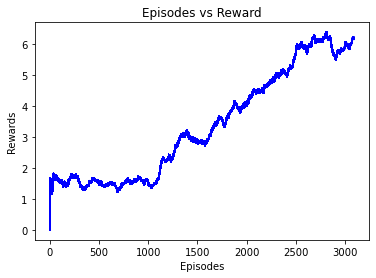

In [28]:

for e in range(start, EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory 
        
        # notes: memory management for preventing overuse of memory
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
#         agent.memory.half_length()
        

        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
#                 torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                torch.save(agent.policy_net.state_dict(), f"./breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


In [29]:
# print(agent.memory)
# params = dict()
# # params["epsilon"] = agent.epsilon
# # params["agent_memory"]= agent.memory
# params["rewards"] = rewards 
# params["episodes"] = episodes
# params["best_eval_reward"] = best_eval_reward
# joblib.dump(agent,"prev_agent")
# joblib.dump(params,"prev_params")

In [31]:
torch.save(agent.policy_net.state_dict(), f"./save_model/breakout_DQN_3093_episodes.pth")

# Creating a DQN LSTM Agent

Now we will create a DQN agent that uses LSTM rather than past frames as history. We augment the experience replay to contain previous few (state, action, reward, next state) tuples rather than just one (state, action, reward, next state) tuple so it can work with LSTMs. Use the previous tuples to generate the current hidden and context vector for LSTM. 
Esentially, when you get a sample from replay buffer during training, start with the first tuple and generate hidden and context vector from this and pass it onto the next tuple. Do so consequitively till you reach the last tuple, where you will make Q value predictions.
Training loop remains nearly the same.

In [ ]:
from agent import LSTM_Agent
agent = LSTM_Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

HISTORY_SIZE = 1
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([HISTORY_SIZE + 1, 84, 84], dtype=np.uint8)
    step = 0
    state = env.reset()
    next_state = state
    life = number_lives
    hidden = None

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action, hidden = agent.get_action(np.float32(history[:1, :, :]) / 255., hidden)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[1, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:1, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn_lstm.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


# Visualize Agent Performance

BE AWARE THIS CODE BELOW MAY CRASH THE KERNEL IF YOU RUN THE SAME CELL TWICE.

Please save your model before running this portion of the code.

In [ ]:
torch.save(agent.policy_net.state_dict(), f"./save_model/breakout_DQN_900_episodes.pth")

In [ ]:
# from gym.wrappers import Monitor # If importing monitor raises issues, try using `from gym.wrappers import RecordVideo`
from gym.wrappers import RecordVideo
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [ ]:
display = Display(visible=0, size=(300, 200))
display.start()

# Load agent
# agent.load_policy_net("./save_model/breakout_dqn.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = gym.make('BreakoutDeterministic-v4')
env = wrap_env(env)

done = False
score = 0
step = 0
state = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state)

while not done:
    
    # Render breakout
    env.render()
#     show_state(env,step) # uncommenting this provides another way to visualize the game

    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state
    
    next_state, reward, done, info = env.step(action + 1)
        
    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['ale.lives'])
        
    life = info['ale.lives']
    r = np.clip(reward, -1, 1) 
    r = reward

    # Store the transition in memory 
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward
    
    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()
display.stop()